<img src="images/usm.jpg" width="480" height="240" align="left"/>

# MAT281 - Laboratorio N°04

## Objetivos del laboratorio

* Reforzar conceptos básicos de reducción de dimensionalidad.

## Contenidos

* [Problema 01](#p1)


<a id='p1'></a>
## I.- Problema 01


<img src="https://www.goodnewsnetwork.org/wp-content/uploads/2019/07/immunotherapy-vaccine-attacks-cancer-cells-immune-blood-Fotolia_purchased.jpg" width="360" height="360" align="center"/>


El **cáncer de mama**  es una proliferación maligna de las células epiteliales que revisten los conductos o lobulillos mamarios. Es una enfermedad clonal; donde una célula individual producto de una serie de mutaciones somáticas o de línea germinal adquiere la capacidad de dividirse sin control ni orden, haciendo que se reproduzca hasta formar un tumor. El tumor resultante, que comienza como anomalía leve, pasa a ser grave, invade tejidos vecinos y, finalmente, se propaga a otras partes del cuerpo.

El conjunto de datos se denomina `BC.csv`, el cual contine la información de distintos pacientes con tumosres (benignos o malignos) y algunas características del mismo.


Las características se calculan a partir de una imagen digitalizada de un aspirado con aguja fina (FNA) de una masa mamaria. Describen las características de los núcleos celulares presentes en la imagen.
Los detalles se puede encontrar en [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].


Lo primero será cargar el conjunto de datos:

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
# cargar datos
df = pd.read_csv(os.path.join("data","BC.csv"), sep=",")
df['diagnosis'] = df['diagnosis'] .replace({'M':1,'B':0})
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Basado en la información presentada responda las siguientes preguntas:


1. Normalizar para las columnas numéricas con procesamiento **StandardScaler**.
2. Realice un gráfico de correlación. Identifique la existencia de colinealidad.
3. Realizar un ajuste PCA con **n_components = 10**. Realice un gráfico de la varianza y varianza acumulada. Interprete.
4. Devuelva un dataframe con las componentes principales.
5. Aplique al menos tres modelos de clasificación. Para cada modelo, calule el valor de sus métricas.

In [6]:
from sklearn.preprocessing import StandardScaler

features = df.columns

x = df.loc[:, features].values
y = df.loc[:, ['id']].values

x = StandardScaler().fit_transform(x)

<function matplotlib.pyplot.show(*args, **kw)>

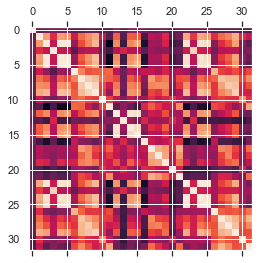

In [7]:
import matplotlib.pyplot as plt

plt.matshow(df.corr())
plt.show

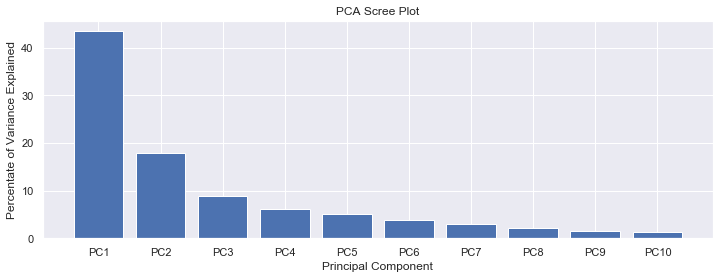

In [23]:
# ajustar modelo
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
principalComponents = pca.fit_transform(x)

# graficar varianza por componente
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10']

plt.figure(figsize=(12,4))
plt.bar(x= range(1,11), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

In [28]:
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

principalDataframe = pd.DataFrame(data = principalComponents, columns = ['PC1','PC2'])
targetDataframe = df[['id']]

newDataframe = pd.concat([principalDataframe, targetDataframe],axis = 1)
newDataframe.head()

,PC1,PC2,id
0,9.216724,2.136750,842302
1,2.651244,-3.770741,842517
2,5.900697,-1.010916,84300903
3,7.137376,10.315636,84348301
4,4.139263,-1.916891,84358402


In [30]:
#regresion lineal
from sklearn import datasets
from sklearn.model_selection import train_test_split

# import some data to play with

X = newDataframe[['PC1']] # we only take the first two features.
y = newDataframe['PC2']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# print rows train and test sets
print('Separando informacion:\n')
print('numero de filas data original : ',len(X))
print('numero de filas train set     : ',len(X_train))
print('numero de filas test set      : ',len(X_test))

Separando informacion:

numero de filas data original :  569
numero de filas train set     :  455
numero de filas test set      :  114


In [31]:
# importando el modelo de regresión lineal
from sklearn.linear_model import LinearRegression

model_rl = LinearRegression() # Creando el modelo.

In [32]:
# ajustando el modelo
model_rl.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
# predicciones
Y_predict = model_rl.predict(X_test)
Y_predict

array([-0.11238302, -0.11995157,  0.0125284 , -0.07297768, -0.02415614,
       -0.10897383, -0.18321097, -0.10514347,  0.04475319,  0.00280625,
        0.06759775, -0.14951575, -0.15493938,  0.07549525,  0.00659467,
       -0.03265074,  0.07481621,  0.02373814, -0.11243566, -0.15683419,
        0.04787669,  0.03429396, -0.15165709,  0.00334527, -0.12468537,
       -0.08716901, -0.03671042, -0.17990205, -0.41178816, -0.07518535,
       -0.29661447,  0.03699618, -0.22124287, -0.08247492,  0.06327636,
        0.07529461, -0.07173548,  0.01742023, -0.05370395,  0.0641183 ,
        0.00954234,  0.01662867, -0.01749019,  0.04086192, -0.00460216,
       -0.24994187,  0.00435916,  0.0947007 ,  0.04273112, -0.12126375,
       -0.17254465, -0.39610379, -0.03526336,  0.11193995,  0.02918652,
        0.07580992,  0.06327403, -0.05973858,  0.01875596,  0.05957672,
        0.13210983, -0.29028579, -0.05453394,  0.06368814,  0.07828794,
       -0.01408497,  0.06943796, -0.18270038,  0.0832925 ,  0.05

In [38]:
#metricas
from metrics_classification import *
from sklearn.metrics import confusion_matrix
from sklearn.metrics import metrics_classification
y_true =  list(Y_test)
y_pred = list(rlog.predict(X_test))

print('Valores:\n')
print('originales: ', y_true)
print('predicho:   ', y_pred)


print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_true,y_pred))

# ejemplo 
df_temp = pd.DataFrame(
    {
        'y':y_true,
        'yhat':y_pred
        }
)

df_metrics = summary_metrics(df_temp)
print("\nMetricas para los regresores : 'sepal length (cm)' y  'sepal width (cm)'")
print("")
print(df_metrics)

ModuleNotFoundError: No module named 'metrics_classification'